In [10]:
import pathlib
import pickle 
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import src code for automation
from parser import collect_experiments
from constants import X86MinorCPU, X86TimingSimpleCPU
from constants import LPDDR2Speed1066, DDDR3Speed1600, DDDR3Speed2133

In [11]:
# functions
def plot_results(plt_obj, x, y, title, legend_title, color, xlabel, ylabel):
    plt_obj.plot(x, y, marker='o', color=color, linestyle='--', label=legend_title) 
    plt_obj.set_title(title) #, loc='center')
    plt_obj.set_xlabel(xlabel)
    plt_obj.set_ylabel(ylabel)    
    plt_obj.legend()


def plot_bar_results(plt_obj, x, y, title, legend_title, color, xlabel, ylabel):
    bars = plt_obj.bar(x, y, color=color, label=legend_title) 
    # plt.bar_label(bars, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y[:-1], y[1:])])
    # plt.bar_label(bars, y)
    plt_obj.set_title(title)
    plt_obj.set_xlabel(xlabel)
    plt_obj.set_ylabel(ylabel)    
    plt_obj.legend()



In [12]:
# collect data from log files for all experiments
results = collect_experiments()
# print(pprint.pformat(results))

Parsing data for x86_minor_2000mhz_lpddr2_1066
Parsing data for x86_timing_2500mhz_ddr3_2133
Parsing data for x86_minor_2000mhz_ddr3_1600
Parsing data for x86_timing_3000mhz_ddr3_2133
Parsing data for x86_minor_2000mhz_ddr3_2133
Parsing data for x86_minor_1000mhz_ddr3_2133
Parsing data for x86_timing_1000mhz_ddr3_2133
Parsing data for x86_minor_2500mhz_ddr3_2133
Parsing data for 86_minor_1500mhz_ddr3_2133
Parsing data for x86_timing_2000mhz_ddr3_2133
Parsing data for x86_timing_1500mhz_ddr3_2133
Parsing data for x86_timing_2000mhz_lpddr2_1066
Parsing data for x86_minor_3000mhz_ddr3_2133
Parsing data for x86_timing_2000mhz_ddr3_1600


In [13]:
print(results)

{x86_minor_2000mhz_lpddr2_1066 ::: X86MinorCPU, 2000.0 Mhz, LPDDR2_S4_1066_1x32: {'simSeconds': ['1.652311'], 'simInsts': ['3185093259'], 'system.cpu.numCycles': ['3304621983'], 'system.cpu.numInstssystem.cpu.committedInstType_0::IntAlu': [], 'system.cpu.committedInstType_0::IntMult': ['9000005', '0.38%', '60.32%'], 'system.cpu.committedInstType_0::MemRead': ['773226652', '32.38%', '92.70%'], 'system.cpu.committedInstType_0::MemWrite': ['174312156', '7.30%', '100.00%'], 'system.mem_ctrls.avgRdBWSys': ['45807008.72254653'], 'system.mem_ctrls.avgWrBWSys': ['42067354.36462779'], 'system.cpu.dcache.overallAvgMissLatency::total': ['33967.555645'], 'system.l2.overallAvgMissLatency::total': ['107030.621164'], 'system.mem_ctrls.dram.rank0.averagePower': ['52.797264'], 'system.mem_ctrls.dram.rank1.averagePower': [], 'system.mem_ctrls.dram.rank0.totalEnergy': ['87237498966.582413'], 'system.mem_ctrls.dram.rank1.totalEnergy': []}, x86_timing_2500mhz_ddr3_2133 ::: X86TimingSimpleCPU, 2500.0 Mhz, D

# CPU MODEL METRICS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


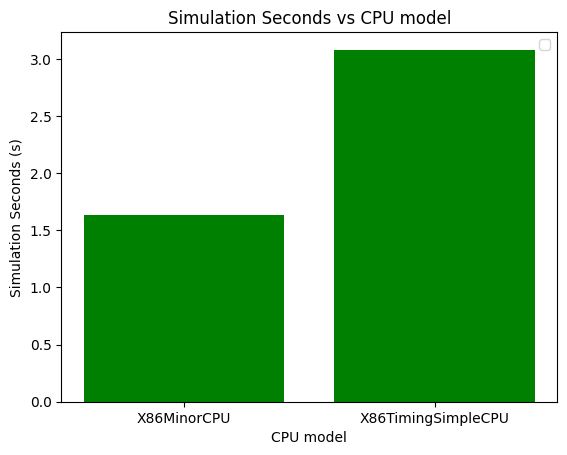

In [14]:
# plot simulation seconds vs CPU type

x1 = []
for k in results.keys():
    if k.cpu_type in [X86TimingSimpleCPU, X86MinorCPU] and k.mem_type == DDDR3Speed2133 and k.clock_freq == 2000 :
        x1 += [k]
y1 = [float(results[k]["simSeconds"][0]) for k in x1]
x1  = [k.cpu_type for k in x1]


figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_bar_results(axis, x1, y1, "Simulation Seconds vs CPU model", None, "green", "CPU model", "Simulation Seconds (s)")

# FREQUENCY METRICS

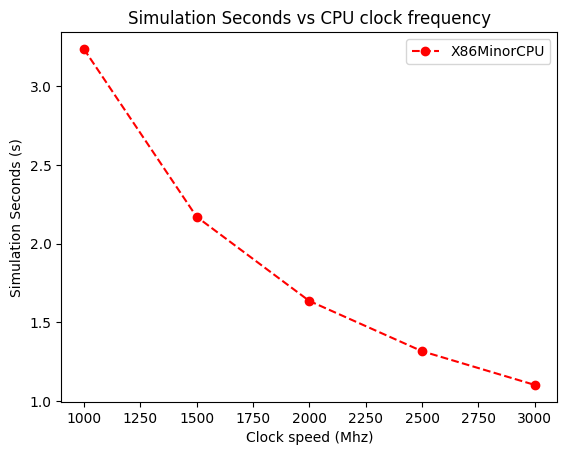

In [15]:
# plot simulation seconds vs clock speed

# collect simulation seconds for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.mem_type == DDDR3Speed2133:
        x1 += [k]
x1.sort(key=lambda k: k.clock_freq)
y1 = [float(results[k]["simSeconds"][0]) for k in x1]
x1  = [k.clock_freq for k in x1]

# collect simulation seconds for X86TimingSimpleCPU

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_results(axis, x1, y1, "Simulation Seconds vs CPU clock frequency", f"{X86MinorCPU}", "red", "Clock speed (Mhz)", "Simulation Seconds (s)")
# plot_results(axis, x2, y2, "Simulation Seconds vs CPU clock frequency", f"{X86TimingSimpleCPU}", "blue", "Clock speed (Mhz)", "Simulation Seconds (s)")

In [16]:
# plot IPC vs clock speed

# # collect simulation seconds for X86MinorCPU
# x1 = []
# for k in results.keys():
#     if k.cpu_type == X86MinorCPU and k.mem_type == DDDR3Speed2133:
#         x1 += [k]
# x1.sort(key=lambda k: k.clock_freq)
# y1 = [float(results[k]["system.cpu.numInsts"][0])/float(results[k]["system.cpu.numCycles"][0]) for k in x1]
# x1  = [k.clock_freq for k in x1]

# # collect simulation seconds for X86TimingSimpleCPU
# x2 = []
# for k in results.keys():
#     if k.cpu_type == X86TimingSimpleCPU and k.mem_type == DDDR3Speed2133:
#         x2 += [k]
# x2.sort(key=lambda k: k.clock_freq)
# y2 = [float(results[k]["system.cpu.numInsts"][0])/float(results[k]["system.cpu.numCycles"][0]) for k in x2]
# x2  = [k.clock_freq for k in x2]

# figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
# plot_results(axis, x1, y1, "IPC vs CPU clock frequency", f"{X86MinorCPU}", "red", "Clock speed (Mhz)", "IPC  (insts/clock cycle)")
# plot_results(axis, x2, y2, "IPC vs CPU clock frequency", f"{X86TimingSimpleCPU}", "blue", "Clock speed (Mhz)", "IPC (insts/clock cycle)")

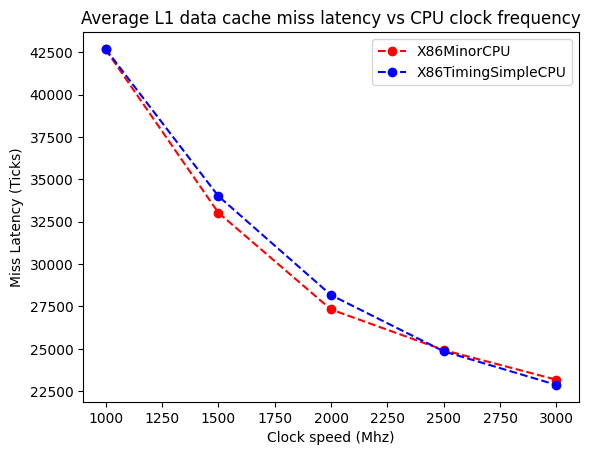

In [17]:
# plot Avg Miss Latency vs clock speed

# collect AvgMissLatency for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.mem_type == DDDR3Speed2133:
        x1 += [k]
x1.sort(key=lambda k: k.clock_freq)
y1 = [float(results[k]["system.cpu.dcache.overallAvgMissLatency::total"][0]) for k in x1]
x1  = [k.clock_freq for k in x1]
# y1 = np.array(y1)
# y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))#y1/np.linalg.norm(y1)


# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and k.mem_type == DDDR3Speed2133:
        x2 += [k]
x2.sort(key=lambda k: k.clock_freq)
y2 = [float(results[k]["system.cpu.dcache.overallAvgMissLatency::total"][0]) for k in x2]
x2  = [k.clock_freq for k in x2]

# y2 = np.array(y2)
# y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2)) #y2/np.linalg.norm(y2)

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_results(axis, x1, y1, "Average L1 data cache miss latency vs CPU clock frequency", f"{X86MinorCPU}", "red", "Clock speed (Mhz)", "Miss Latency (Ticks)")
plot_results(axis, x2, y2, "Average L1 data cache miss latency vs CPU clock frequency", f"{X86TimingSimpleCPU}", "blue", "Clock speed (Mhz)", "Miss Latency (Ticks)")

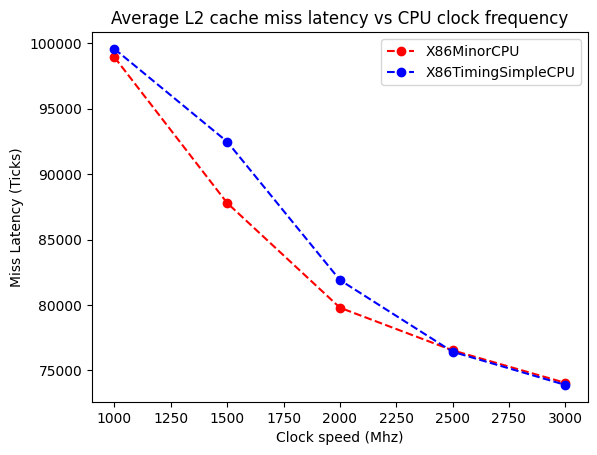

In [18]:
# plot Avg Miss Latency vs clock speed

# collect AvgMissLatency for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.mem_type == DDDR3Speed2133:
        x1 += [k]
x1.sort(key=lambda k: k.clock_freq)
y1 = [float(results[k]["system.l2.overallAvgMissLatency::total"][0]) for k in x1]
x1  = [k.clock_freq for k in x1]
# y1 = np.array(y1)
# y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))#y1/np.linalg.norm(y1)


# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and k.mem_type == DDDR3Speed2133:
        x2 += [k]
x2.sort(key=lambda k: k.clock_freq)
y2 = [float(results[k]["system.l2.overallAvgMissLatency::total"][0]) for k in x2]
x2  = [k.clock_freq for k in x2]

# y2 = np.array(y2)
# y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2)) #y2/np.linalg.norm(y2)

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_results(axis, x1, y1, "Average L2 cache miss latency vs CPU clock frequency", f"{X86MinorCPU}", "red", "Clock speed (Mhz)", "Miss Latency (Ticks)")
plot_results(axis, x2, y2, "Average L2 cache miss latency vs CPU clock frequency", f"{X86TimingSimpleCPU}", "blue", "Clock speed (Mhz)", "Miss Latency (Ticks)")

# MEMORY METRICS

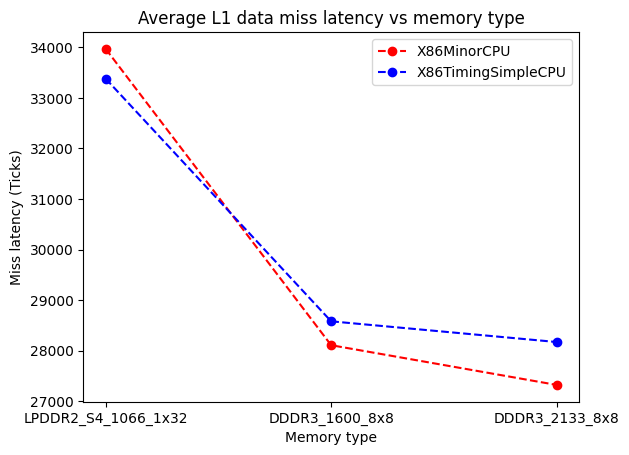

In [28]:
# plot simulation seconds vs memory type

# choose baseline model 
baseline = "DDDR3_1600_8x8"
# collect simulation seconds for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.clock_freq == 2000:
        x1 += [k]
x1.sort(key=lambda k: k.memory_type_order)
y1 = [float(results[k]["system.cpu.dcache.overallAvgMissLatency::total"][0]) for k in x1]
x1  = [k.mem_type for k in x1]

# y1 = np.array(y1)
# y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))#y1/np.linalg.norm(y1)y=lambda k: k.memory_type_order)

# base = y1[0]
# y1 = [(k - base)/base for k in y1]


# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and  k.clock_freq == 2000:
        x2 += [k]
x2.sort(key=lambda k: k.memory_type_order)
y2 = [float(results[k]["system.cpu.dcache.overallAvgMissLatency::total"][0]) for k in x2]
x2  = [k.mem_type for k in x2]

# y2 = np.array(y2)
# y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2)) #y2/np.linalg.norm(y2)
# base = y2[0]
# y2 = [(k - base)/base  for k in y2]

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
# plt.yscale("log")
plot_results(axis, x1, y1, "Average L1 data miss latency vs memory type", f"{X86MinorCPU}", "red", "Memory type", "Miss latency (Ticks)")
plot_results(axis, x2, y2, "Average L1 data miss latency vs memory type", f"{X86TimingSimpleCPU}", "blue", "Memory type", "Miss latency (Ticks)")
# figure.text(.5, -0.05, "Scatter Plot", ha='center')

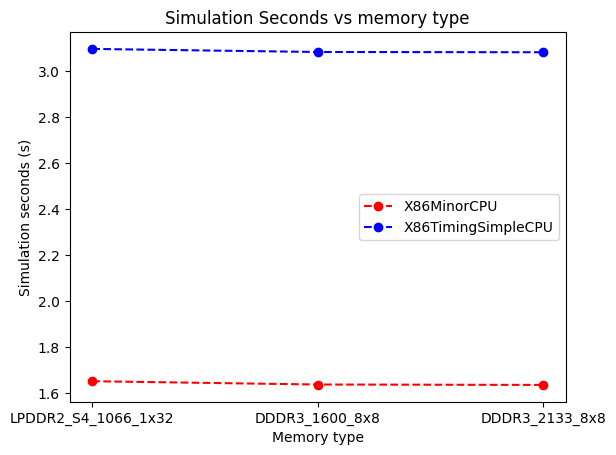

In [32]:
# plot simulation seconds vs memory type

# choose baseline model 
baseline = "DDDR3_1600_8x8"
# collect simulation seconds for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.clock_freq == 2000:
        x1 += [k]
x1.sort(key=lambda k: k.memory_type_order)
y1 = [float(results[k]["simSeconds"][0]) for k in x1]
x1  = [k.mem_type for k in x1]

# y1 = np.array(y1)
# y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))#y1/np.linalg.norm(y1)y=lambda k: k.memory_type_order)

# base = y1[0]
# y1 = [(k - base)/base for k in y1]


# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and  k.clock_freq == 2000:
        x2 += [k]
x2.sort(key=lambda k: k.memory_type_order)
y2 = [float(results[k]["simSeconds"][0]) for k in x2]
x2  = [k.mem_type for k in x2]

# y2 = np.array(y2)
# y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2)) #y2/np.linalg.norm(y2)
# base = y2[0]
# y2 = [(k - base)/base  for k in y2]

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
# plt.yscale("log")
plot_results(axis, x1, y1, "Simulation Seconds vs memory type", f"{X86MinorCPU}", "red", "Memory type", "Simulation seconds (s)")
plot_results(axis, x2, y2, "Simulation Seconds vs memory type", f"{X86TimingSimpleCPU}", "blue", "Memory type", "Simulation seconds (s)")
# figure.text(.5, -0.05, "Scatter Plot", ha='center')

# df = pd.DataFrame(zip(y1+y2, [X86MinorCPU]*3 + [X86TimingSimpleCPU]*3  ,x1+x2), columns = ["Simulation Seconds (s)", "CPU Type", "Memory type"])
# g = sns.catplot(x='Memory type', y='Simulation Seconds (s)', legend_out=False,
# hue='CPU Type', data=df, kind='bar', height=5, aspect=2, palette=["red", "dodgerblue"])
# g.set_axis_labels("Memory type", "Simulation Seconds (s)")
# g.set_xticklabels(x1)
# g.fig.suptitle("Simulation Seconds vs Memory type",fontsize=15)

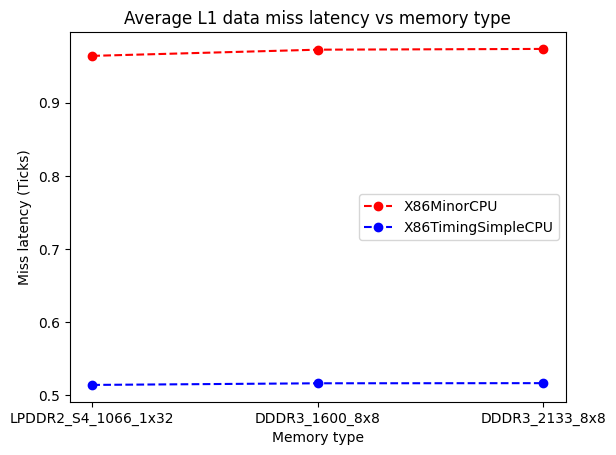

In [27]:
# plot IPC vs memory type

# choose baseline model 
baseline = "DDDR3_1600_8x8"
# collect simulation seconds for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.clock_freq == 2000:
        x1 += [k]
x1.sort(key=lambda k: k.memory_type_order)
y1 = [float(results[k]["simInsts"][0])/float(results[k]["system.cpu.numCycles"][0]) for k in x1]
x1  = [k.mem_type for k in x1]

# y1 = np.array(y1)
# y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))
# y1 =y1/np.linalg.norm(y1)

# base = y1[0]
# y1 = [(k - base)/base for k in y1]


# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and  k.clock_freq == 2000:
        x2 += [k]
x2.sort(key=lambda k: k.memory_type_order)
y2 = [float(results[k]["simInsts"][0])/float(results[k]["system.cpu.numCycles"][0]) for k in x2]
x2  = [k.mem_type for k in x2]

# y2 = np.array(y2)
# y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2)) 
# y2 = y2/np.linalg.norm(y2)
# base = y2[0]
# y2 = [(k - base)/base  for k in y2]

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
# plt.yscale("log")
plot_results(axis, x1, y1, "Average L1 data miss latency vs memory type", f"{X86MinorCPU}", "red", "Memory type", "Miss latency (Ticks)")
plot_results(axis, x2, y2, "Average L1 data miss latency vs memory type", f"{X86TimingSimpleCPU}", "blue", "Memory type", "Miss latency (Ticks)")
# figure.text(.5, -0.05, "Scatter Plot", ha='center')

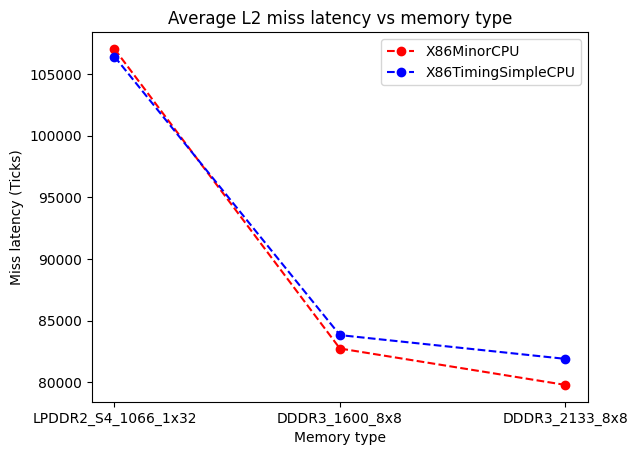

In [21]:
# plot simulation seconds vs memory type

# choose baseline model 
baseline = "DDDR3_1600_8x8"
# collect simulation seconds for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.clock_freq == 2000:
        x1 += [k]
x1.sort(key=lambda k: k.memory_type_order)
y1 = [float(results[k]["system.l2.overallAvgMissLatency::total"][0]) for k in x1]
x1  = [k.mem_type for k in x1]

# y1 = np.array(y1)
# y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))#y1/np.linalg.norm(y1)y=lambda k: k.memory_type_order)

# base = y1[0]
# y1 = [(k - base)/base for k in y1]


# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and  k.clock_freq == 2000:
        x2 += [k]
x2.sort(key=lambda k: k.memory_type_order)
y2 = [float(results[k]["system.l2.overallAvgMissLatency::total"][0]) for k in x2]
x2  = [k.mem_type for k in x2]

# y2 = np.array(y2)
# y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2)) #y2/np.linalg.norm(y2)
# base = y2[0]
# y2 = [(k - base)/base  for k in y2]

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
# plt.yscale("log")
plot_results(axis, x1, y1, "Average L2 miss latency vs memory type", f"{X86MinorCPU}", "red", "Memory type", "Miss latency (Ticks)")
plot_results(axis, x2, y2, "Average L2 miss latency vs memory type", f"{X86TimingSimpleCPU}", "blue", "Memory type", "Miss latency (Ticks)")
# figure.text(.5, -0.05, "Scatter Plot", ha='center')

[52.797264, 481.470616, 547.676727] ['LPDDR2_S4_1066_1x32', 'DDDR3_1600_8x8', 'DDDR3_2133_8x8']


Text(0.5, 0.98, 'Average Power vs Memory type')

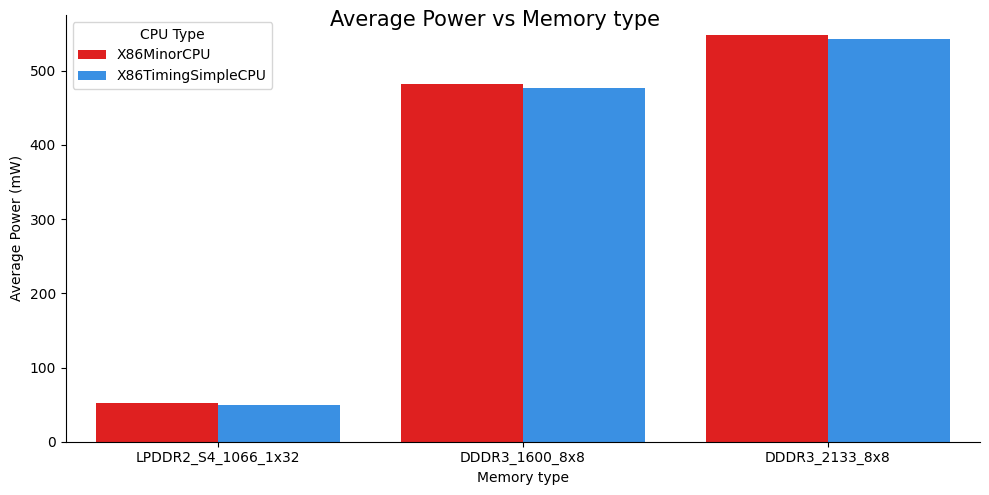

In [29]:
# plot Average Power over rank0 vs memory type

# choose baseline model 
baseline = "DDDR3_1600_8x8"
# collect simulation seconds for X86MinorCPU
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.clock_freq == 2000:
        x1 += [k]
x1.sort(key=lambda k: k.memory_type_order)
y1 = [float(results[k]["system.mem_ctrls.dram.rank0.averagePower"][0])  for k in x1]
x1  = [k.mem_type for k in x1]

# y1 = np.array(y1)
# y1 = (y1-np.min(y1))# plot IPC vs memory type

print(y1, x1)
# y1 = np.array(y1)
# y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))
# y1 =y1/np.linalg.norm(y1)

# base = y1[0]
# y1 = [(k - base)/base for k in y1]


# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and  k.clock_freq == 2000:
        x2 += [k]
x2.sort(key=lambda k: k.memory_type_order)
y2 = [float(results[k]["system.mem_ctrls.dram.rank0.averagePower"][0]) for k in x2]
x2  = [k.mem_type for k in x2]

# y2 = np.array(y2)
# y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2)) 
# y2 = y2/np.linalg.norm(y2)
# base = y2[0]
# y2 = [(k - base)/base  for k in y2]

# figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
# # plt.yscale("log")
# plot_results(axis, x1, y1, "Average Power vs Memory type", f"{X86MinorCPU}", "red", "Memory type", "Power (mW)")
# plot_results(axis, x2, y2, "Average Power vs Memory type", f"{X86TimingSimpleCPU}", "blue", "Memory type", "Power (mW)")
# figure.text(.5, -0.05, "Scatter Plot", ha='center')/(np.max(y1)-np.min(y1))
# y1 =y1/np.linalg.norm(y1)


df = pd.DataFrame(zip(y1+y2, [X86MinorCPU]*3 + [X86TimingSimpleCPU]*3  ,x1+x2), columns = ["Average Power (mW)", "CPU Type", "Memory type"])
g = sns.catplot(x='Memory type', y='Average Power (mW)', legend_out=False,
hue='CPU Type', data=df, kind='bar', height=5, aspect=2, palette=["red", "dodgerblue"])
g.set_axis_labels("Memory type", "Average Power (mW)")
g.set_xticklabels(x1)
g.fig.suptitle("Average Power vs Memory type",fontsize=15)

Text(0.5, 0.98, 'Total energy vs Memory type')

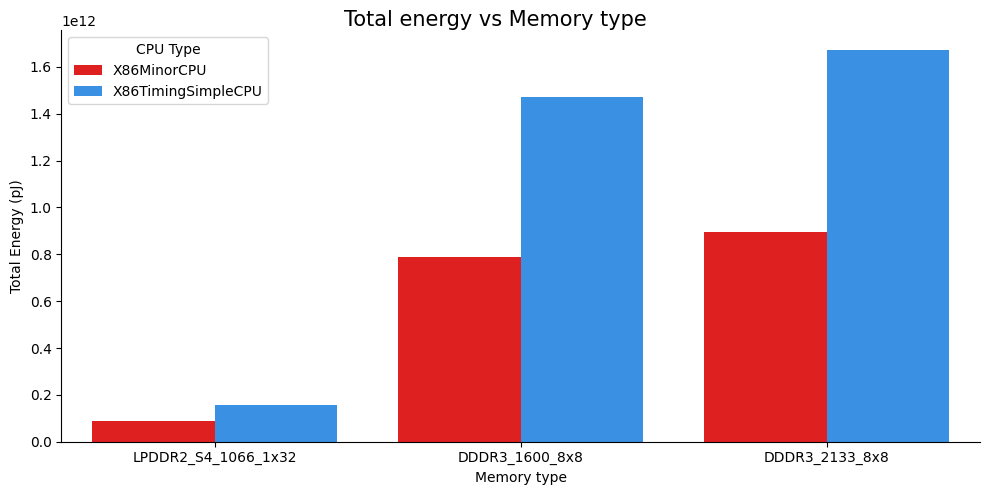

In [23]:
# plot Total energy over rank0 vs memory type

# choose baseline model 
baseline = "DDDR3_1600_8x8"
x1 = []
for k in results.keys():
    if k.cpu_type == X86MinorCPU and k.clock_freq == 2000:
        x1 += [k]
x1.sort(key=lambda k: k.memory_type_order)

y1 = [float(results[k]["system.mem_ctrls.dram.rank0.totalEnergy"][0]) for k in x1]
x1  = [k.mem_type for k in x1]

# collect simulation seconds for X86TimingSimpleCPU
x2 = []
for k in results.keys():
    if k.cpu_type == X86TimingSimpleCPU and  k.clock_freq == 2000:
        x2 += [k]
x2.sort(key=lambda k: k.memory_type_order)
y2 = [float(results[k]["system.mem_ctrls.dram.rank0.totalEnergy"][0]) for k in x2]
x2  = [k.mem_type for k in x2]

# plot 
df = pd.DataFrame(zip(y1+y2, [X86MinorCPU]*3 + [X86TimingSimpleCPU]*3  ,x1+x2), columns = ["Total Energy (pJ)", "CPU Type", "Memory type"])
g = sns.catplot(x='Memory type', y='Total Energy (pJ)', legend_out=False,
hue='CPU Type', data=df, kind='bar', height=5, aspect=2, palette=["red", "dodgerblue"])
g.set_axis_labels("Memory type", "Total Energy (pJ)")
g.set_xticklabels(x1)
g.fig.suptitle("Total energy vs Memory type",fontsize=15)